# Exploring the Intersection of Race/Ethnicity, COVID-19, and Breast Cancer
### by Shan Lian
My research is centered around the investigation of the relationship between race and two significant health variables: COVID-19 severity and breast cancer incidence. My hypothesis posits a positive correlation between race and both COVID-19 and breast cancer.

In [5]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import chi2_contingency

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


In [6]:
raw_data.columns

Index(['der_ordinal_v1a', 'der_days_fu', 'der_deadbinary', 'der_dead30',
       'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp', 'der_MOF_comp',
       'der_coinfection_any', 'der_sepsis_comp', 'der_bleeding_comp',
       'der_rem', 'der_hcq', 'der_steroids_c19', 'der_other_tx_c19_v2',
       'der_o2_ever', 'der_race_v2', 'der_insurance', 'der_smoking2',
       'der_obesity', 'der_card', 'der_pulm', 'der_renal', 'der_dm2',
       'der_ecogcat2', 'der_breast_biomarkers', 'der_cancer_status_v4',
       'der_cancer_tx_timing_v2', 'der_cancertr_none', 'der_any_cyto',
       'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m', 'der_other_3m',
       'der_any_endo', 'der_any_immuno', 'der_any_local', 'der_any_other',
       'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_event', 'der_GI_e

In [7]:
clean_data = pd.DataFrame({
    'Race': raw_data['der_race_v2'],
    'Cancer Status': raw_data['der_cancer_status_v4'],
    'COVID-19 Severity': raw_data['severity_of_covid_19_v2'],
    'Death (Binary)': raw_data['der_deadbinary'],
    'Death (30days)':raw_data['der_dead30'],
    'Mechanical Ventilation': raw_data['der_mv'],
    'ICU Admission': raw_data['der_ICU'],
    'Hospitalization': raw_data['der_hosp'],
    'Cardiovascular Event': raw_data['der_CV_event_v2'],
    'Pulmonary Event': raw_data['der_pulm_event'],
    'GI Event': raw_data['der_GI_event'],
    'Bleeding Complication': raw_data['der_bleeding_comp'],
    'Acute Kidney Injury': raw_data['der_AKI_comp'],
    'Multisystem Organ Failure': raw_data['der_MOF_comp'],
    'Coinfection': raw_data['der_coinfection_any'],
    'Remdesivir Treatment': raw_data['der_rem'],
    'Hydroxychloroquine Treatment': raw_data['der_hcq'],
    'Steroids Treatment': raw_data['der_steroids_c19'],
    'Other COVID-19 Treatment': raw_data['der_other_tx_c19_v2']})


clean_data

,Race,Cancer Status,COVID-19 Severity,Death (Binary),Death (30days),Mechanical Ventilation,ICU Admission,Hospitalization,Cardiovascular Event,Pulmonary Event,GI Event,Bleeding Complication,Acute Kidney Injury,Multisystem Organ Failure,Coinfection,Remdesivir Treatment,Hydroxychloroquine Treatment,Steroids Treatment,Other COVID-19 Treatment
0,Non-Hispanic White,Active and responding,Severe,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No
1,Hispanic,Active and stable,Mild,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Yes
2,Hispanic,NaN,Moderate,No,No,No,No,Yes,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN
3,Other,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No
4,Hispanic,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Other,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1379,Non-Hispanic Black,Active and responding,Moderate,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years",Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1381,Non-Hispanic Black,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes


In [8]:
clean_data.columns


Index(['Race', 'Cancer Status', 'COVID-19 Severity', 'Death (Binary)',
       'Death (30days)', 'Mechanical Ventilation', 'ICU Admission',
       'Hospitalization', 'Cardiovascular Event', 'Pulmonary Event',
       'GI Event', 'Bleeding Complication', 'Acute Kidney Injury',
       'Multisystem Organ Failure', 'Coinfection', 'Remdesivir Treatment',
       'Hydroxychloroquine Treatment', 'Steroids Treatment',
       'Other COVID-19 Treatment'],
      dtype='object')

In [9]:
race_counts = clean_data['Race'].dropna()
race_counts = clean_data['Race'].value_counts()
race_counts

Race
Non-Hispanic White    736
Non-Hispanic Black    289
Hispanic              235
Other                  78
Non-Hispanic AAPI      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Race Distribution in the study')

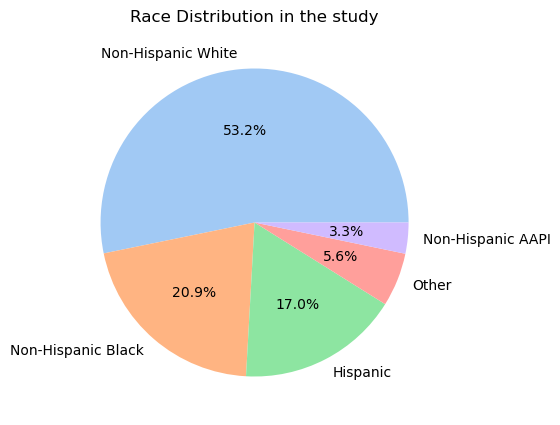

In [10]:
palette = sns.color_palette("pastel", 5)
plt.figure(figsize=(5, 5))
plt.pie(race_counts, labels=race_counts.index, colors=palette, autopct='%1.1f%%')
plt.title('Race Distribution in the study')


In [11]:
#merge new df with percentage list on it
race_counts_df = pd.DataFrame({'Count': [235, 45, 289, 736, 78]}, 
                              index=['Hispanic', 'Non-Hispanic AAPI', 'Non-Hispanic Black', 'Non-Hispanic White','Other'])

race_percentage = (race_counts_df / race_counts_df.sum() * 100).round(2).astype(str) + '%'
race_counts_df['Percentage'] = race_percentage
race_counts_df



,Count,Percentage
Hispanic,235,16.99%
Non-Hispanic AAPI,45,3.25%
Non-Hispanic Black,289,20.9%
Non-Hispanic White,736,53.22%
Other,78,5.64%


## Race/Ethnic Distribution and COVID-19

In [12]:
covid_severity = pd.DataFrame(clean_data[['Race','COVID-19 Severity']])
covid_severity

,Race,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [13]:
# covid_data in percentage
covid_data_drop = covid_severity.dropna(subset=['COVID-19 Severity'])
covid_data  = covid_data_drop.loc[(clean_data['COVID-19 Severity'] != 'Unknown'), :]

# covid_data = covid_data_clean.set_index(['Race'])

severity_counts = covid_data.groupby(['Race', 'COVID-19 Severity']).size().unstack(fill_value=0)
print(severity_counts)


COVID-19 Severity   Mild  Moderate  Severe
Race                                      
Hispanic             173        56       6
Non-Hispanic AAPI     28        14       3
Non-Hispanic Black   177        97      15
Non-Hispanic White   535       174      25
Other                 50        21       7


In [14]:
covid_data 

,Race,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [15]:
covid_data .columns

Index(['Race', 'COVID-19 Severity'], dtype='object')

In [16]:
crosstabResult = pd.crosstab(index = covid_data['Race'], columns = covid_data['COVID-19 Severity'])
print(crosstabResult)

COVID-19 Severity   Mild  Moderate  Severe
Race                                      
Hispanic             173        56       6
Non-Hispanic AAPI     28        14       3
Non-Hispanic Black   177        97      15
Non-Hispanic White   535       174      25
Other                 50        21       7


In [17]:
chiSq = chi2_contingency(crosstabResult)
print(f'The p_value of the Chi Square is {chiSq[1]}')

The p_value of the Chi Square is 0.004365424803990782


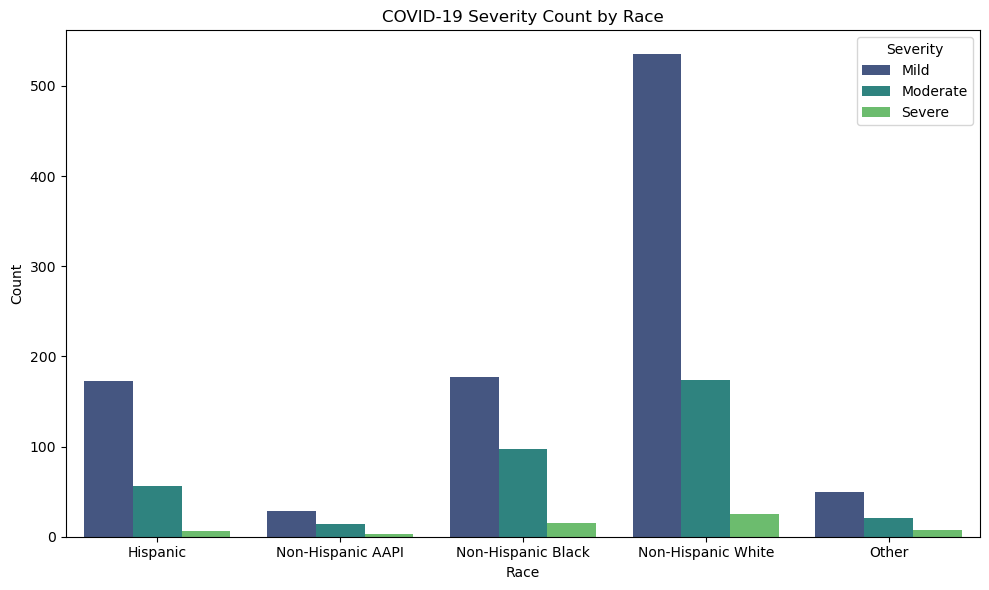

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', hue='COVID-19 Severity', data=covid_severity, palette='viridis')
plt.legend(title='Severity')
plt.title('COVID-19 Severity Count by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()

In [19]:
#however, we cant really see thing from this chart because the number of sample are very different
#so we have to change them to percentage and get their weighted average

In [20]:
normalized_severity = (severity_counts.div(severity_counts.sum(axis=1), axis=0) * 100).round(2).astype(str) + '%'
normalized_severity

COVID-19 Severity,Mild,Moderate,Severe
Race,,,
Hispanic,73.62%,23.83%,2.55%
Non-Hispanic AAPI,62.22%,31.11%,6.67%
Non-Hispanic Black,61.25%,33.56%,5.19%
Non-Hispanic White,72.89%,23.71%,3.41%
Other,64.1%,26.92%,8.97%


In [21]:
race_and_severity = pd.merge(race_counts_df, normalized_severity, left_index=True,right_index=True)

race_and_severity.rename(columns={'Count': 'Race Count','Percentage': 'Race Percentage',
                                  'Mild': 'COVID-19 Severity(Mild)',
                                  'Moderate': 'COVID-19 Severity(Moderate)',
                                  'Severe': 'COVID-19 Severity(Severe)'}, inplace=True)
race_and_severity

,Race Count,Race Percentage,COVID-19 Severity(Mild),COVID-19 Severity(Moderate),COVID-19 Severity(Severe)
Hispanic,235,16.99%,73.62%,23.83%,2.55%
Non-Hispanic AAPI,45,3.25%,62.22%,31.11%,6.67%
Non-Hispanic Black,289,20.9%,61.25%,33.56%,5.19%
Non-Hispanic White,736,53.22%,72.89%,23.71%,3.41%
Other,78,5.64%,64.1%,26.92%,8.97%


In [22]:
race_and_severity_plot = race_and_severity[[ 'COVID-19 Severity(Mild)', 'COVID-19 Severity(Moderate)',
                                            'COVID-19 Severity(Severe)']]
race_and_severity_plot

,COVID-19 Severity(Mild),COVID-19 Severity(Moderate),COVID-19 Severity(Severe)
Hispanic,73.62%,23.83%,2.55%
Non-Hispanic AAPI,62.22%,31.11%,6.67%
Non-Hispanic Black,61.25%,33.56%,5.19%
Non-Hispanic White,72.89%,23.71%,3.41%
Other,64.1%,26.92%,8.97%


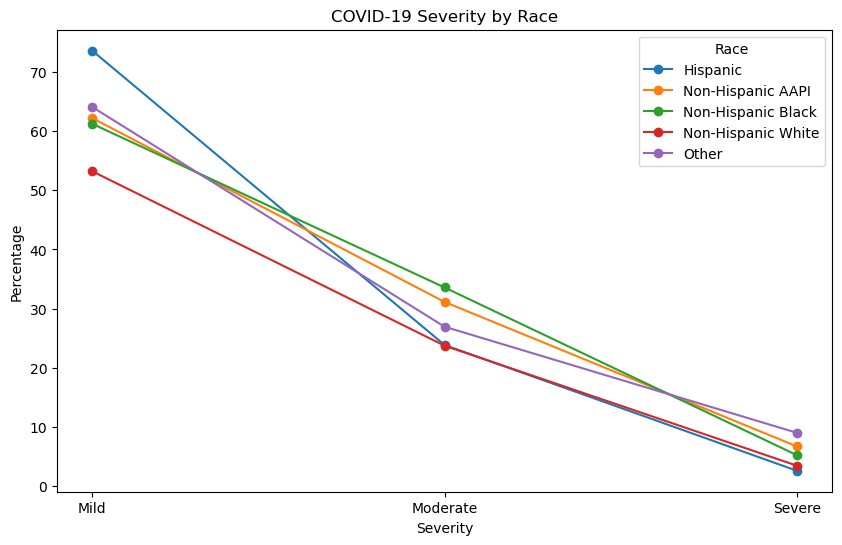

In [23]:
data = {
    'Race': ['Hispanic', 'Non-Hispanic AAPI', 'Non-Hispanic Black', 'Non-Hispanic White', 'Other'],
    'Mild': [73.62, 62.22, 61.25, 53.22, 64.1],
    'Moderate': [23.83, 31.11, 33.56, 23.71, 26.92],
    'Severe': [2.55, 6.67, 5.19, 3.41, 8.97]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    plt.plot(row.index[1:], row.values[1:], marker='o', label=row['Race'])


plt.title('COVID-19 Severity by Race')
plt.xlabel('Severity')
plt.ylabel('Percentage')
plt.legend(title='Race', loc='best')



Text(75.74999999999999, 0.5, 'Race')

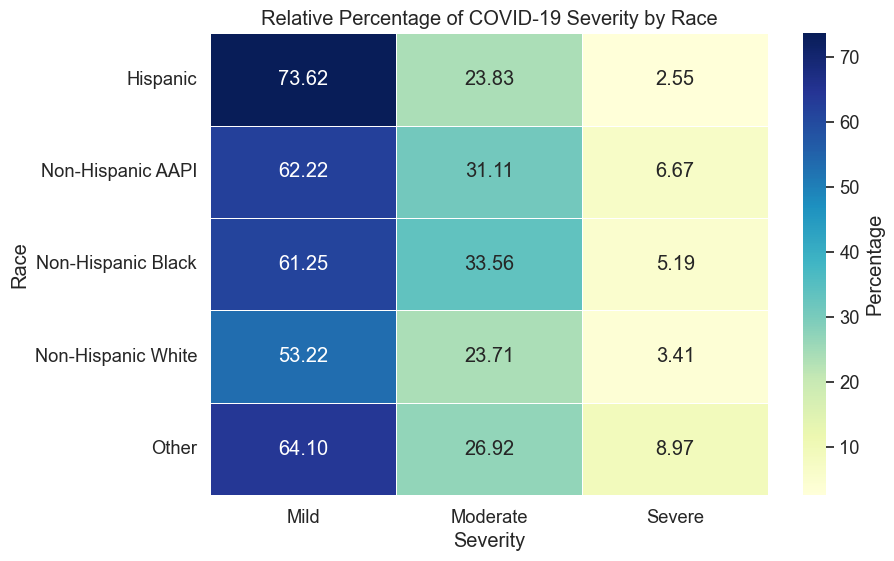

In [24]:
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.2)

sns.heatmap(df.set_index('Race'), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Percentage'})

plt.title('Relative Percentage of COVID-19 Severity by Race')
plt.xlabel('Severity')
plt.ylabel('Race')



## Analysis of the Relationship Between Race/Ethnic Distribution and COVID-19 Severity
The data utilized in this analysis encompasses three core elements: race, COVID-19 severity, and cancer status. To rectify the issue of imbalanced sample populations, a weighted averaging technique was employed for each race category, including COVID-19 severity levels. This method was employed to guarantee equitable representation of all racial groups within the dataset.
#### Key Finding:
The Chi-Square test resulted in a p-value of 0.004365424803990782, which is less than the conventional threshold of 0.05 for statistical significance. This outcome provides strong evidence to reject the null hypothesis and shows that there is an association between Race/Ethnic Distribution and the severity of COVID-19.

The results imply that Race/Ethnic Distribution may play a role in how severely individuals are affected by COVID-19. In general, mild cases are the most prevalent, followed by moderate cases and severe cases. Non-Hispanic Black and AAPI populations, along with the "Other" category, exhibit higher percentages of moderate and severe cases. The 'Hispanic' population tends to experience milder COVID-19 symptoms, while the 'Non-Hispanic White' group displays a relatively even distribution across Severe, Mild, and Moderate categories. This could be due to a variety of factors including, but not limited to the treatment and therapy received such as ICU Admission, Hospitalization, or their pre-existing underlying health conditions.



## Race/Ethnic Distribution and Breast Cancer

In [25]:
cancer_severity = pd.DataFrame(clean_data[['Race','Cancer Status']])
cancer_severity = cancer_severity.dropna(subset=['Cancer Status'])
# cancer_severity = cancer_severity.set_index(['Race/Ethnicity'])
cancer_severity

,Race,Cancer Status
0,Non-Hispanic White,Active and responding
1,Hispanic,Active and stable
3,Other,Unknown
4,Hispanic,Active and responding
5,Non-Hispanic White,"Remission or no evidence of disease, <5 years"
...,...,...
1378,Other,Active and responding
1379,Non-Hispanic Black,Active and responding
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years"
1381,Non-Hispanic Black,Unknown


In [26]:
cancer_status_sum = cancer_severity.groupby(['Race', 'Cancer Status']).size().reset_index(name='Count')
cancer_status_sum = pd.DataFrame(cancer_status_sum)
cancer_status_sum = cancer_status_sum.loc[cancer_status_sum['Cancer Status'] != 'Unknown',:]

cancer_status_sum

,Race,Cancer Status,Count
0,Hispanic,Active and progressing,20
1,Hispanic,Active and responding,56
2,Hispanic,Active and stable,35
3,Hispanic,"Remission or no evidence of disease, <5 years",77
4,Hispanic,"Remission or no evidence of disease, >5 years",23
6,Non-Hispanic AAPI,Active and progressing,6
7,Non-Hispanic AAPI,Active and responding,3
8,Non-Hispanic AAPI,Active and stable,10
9,Non-Hispanic AAPI,"Remission or no evidence of disease, <5 years",11
10,Non-Hispanic AAPI,"Remission or no evidence of disease, >5 years",9


In [27]:
cancer_status_sum.columns

Index(['Race', 'Cancer Status', 'Count'], dtype='object')

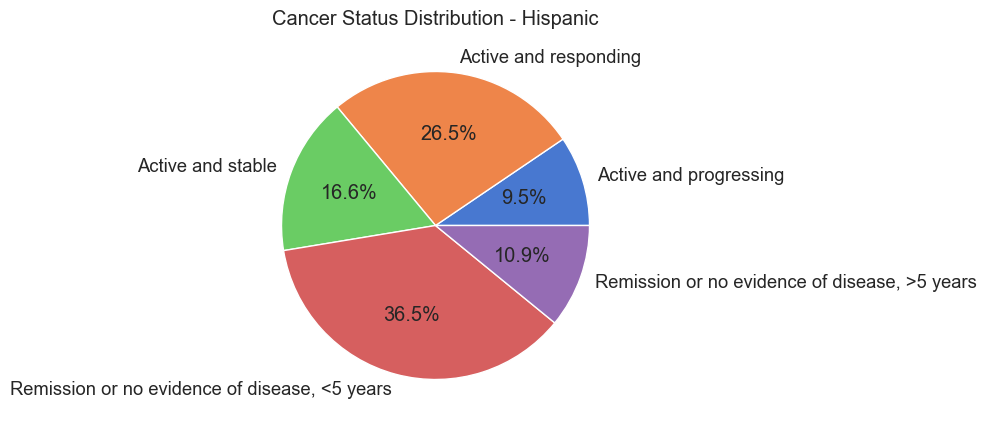

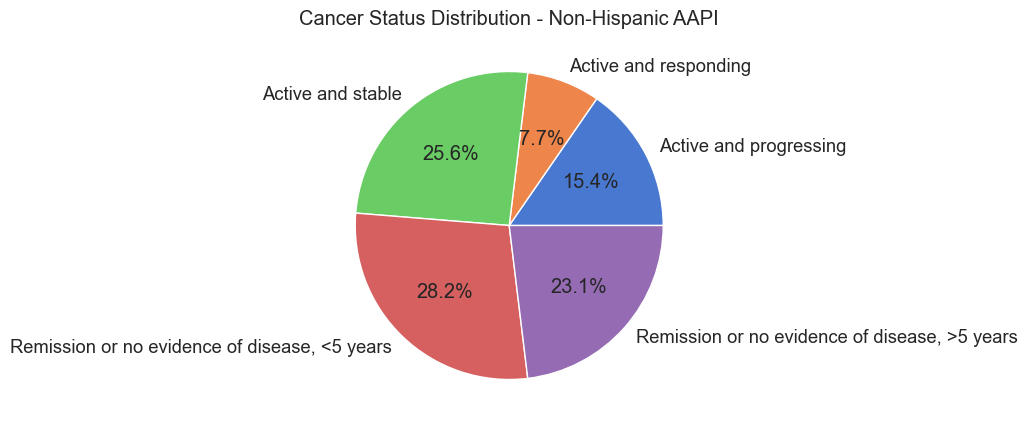

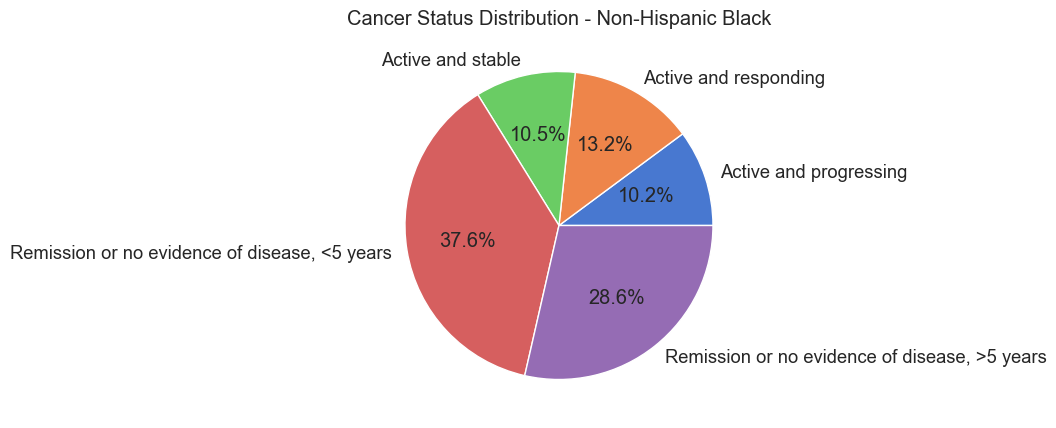

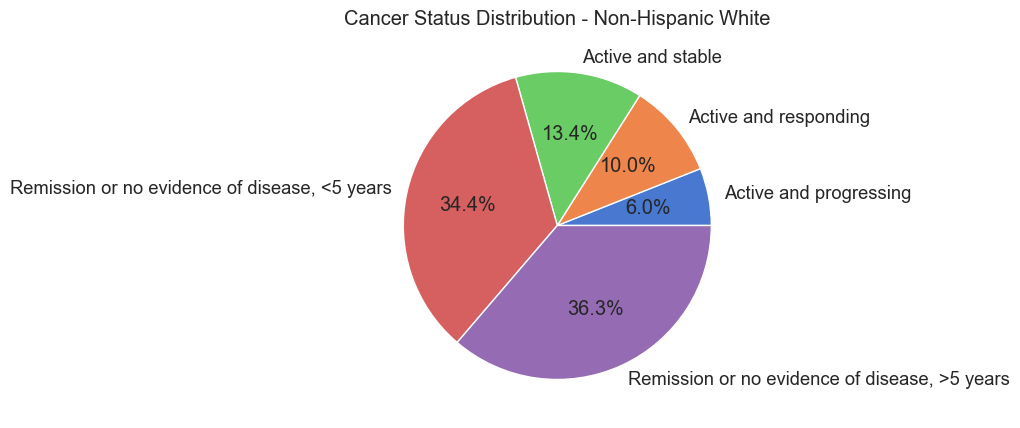

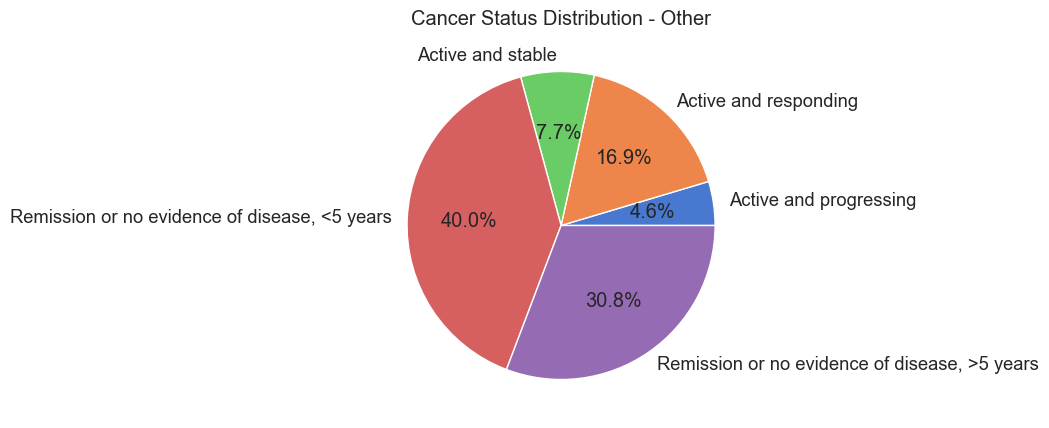

In [28]:
# each ethnicity =  race 
# seaborn palette: "deep","muted","bright","dark" ,"pastel" 

races = cancer_status_sum['Race'].unique()
palette = sns.color_palette("muted", 5)

for race in races:

    race_data = cancer_status_sum[cancer_status_sum['Race'] == race]
    plt.figure(figsize=(5, 5))
    plt.pie(race_data['Count'], labels=race_data['Cancer Status'], autopct='%1.1f%%',colors= palette)
    plt.title(f'Cancer Status Distribution - {race}')


In [34]:
percentages = []

for race in races:
    race_data = cancer_status_sum[cancer_status_sum['Race'] == race]
    total = race_data['Count'].sum()
    for status in race_data['Cancer Status']:
        count = race_data[race_data['Cancer Status'] == status]['Count'].iloc[0]
        percentage = (count / total) * 100
        percentages.append({'Race': race, 'Cancer Status': status, 'Percentage': percentage})

percentage_df = pd.DataFrame(percentages)

percentage_df

,Race,Cancer Status,Percentage
0,Hispanic,Active and progressing,9.478673
1,Hispanic,Active and responding,26.540284
2,Hispanic,Active and stable,16.587678
3,Hispanic,"Remission or no evidence of disease, <5 years",36.492891
4,Hispanic,"Remission or no evidence of disease, >5 years",10.900474
5,Non-Hispanic AAPI,Active and progressing,15.384615
6,Non-Hispanic AAPI,Active and responding,7.692308
7,Non-Hispanic AAPI,Active and stable,25.641026
8,Non-Hispanic AAPI,"Remission or no evidence of disease, <5 years",28.205128
9,Non-Hispanic AAPI,"Remission or no evidence of disease, >5 years",23.076923


<Figure size 2000x500 with 0 Axes>

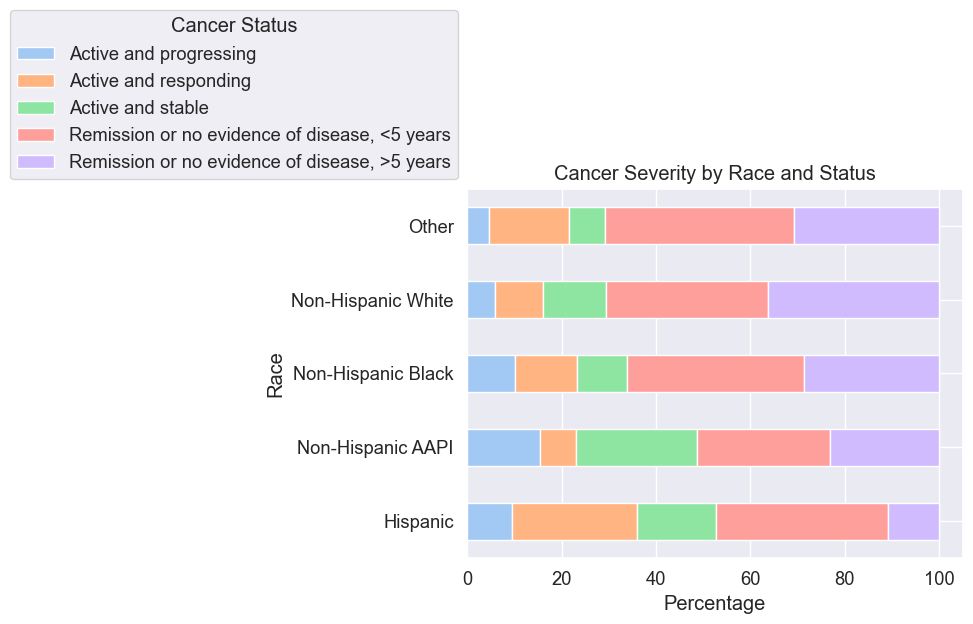

In [67]:
palette = sns.color_palette("pastel", 5)
plt.figure(figsize=(20, 5))
pivot_df = percentage_df.pivot(index='Race', columns='Cancer Status', values='Percentage')
pivot_df.plot(kind='barh', stacked=True, color=palette) 
plt.xlabel('Percentage')
plt.ylabel('Race')
plt.title('Cancer Severity by Race and Status')
plt.legend(title='Cancer Status',loc='lower right',bbox_to_anchor=(0, 1))


In [26]:
table = pd.crosstab(cancer_severity['Race'], cancer_severity['Cancer Status'])

chi2_cancer_severity, p_cancer_severity, dof, expected = chi2_contingency(table)
print(f"Chi-squared value is {chi2_cancer_severity} and the p-value is {p_cancer_severity}")

Chi-squared value is 98.05191807290167 and the p-value is 2.8064344261338783e-12


## Analysis of the Relationship Between Race/Ethnic Distribution and Breast Cancer Severity
### Key Finding:
The Chi-Square test yielded a Chi-squared value of 98.05191807290167 and an exceptionally low p-value of 2.8064344261338783e-12, significantly below the conventional 0.05 threshold for statistical significance. This result provides strong evidence to reject the null hypothesis, indicating a robust and statistically significant association between Race/Ethnic Distribution and breast cancer status.

### Implications:
This analysis reveals the profound impact of Race/Ethnic Distribution on the prevalence and progression of breast cancer. Notably, distinct patterns in breast cancer severity emerge among various racial and ethnic groups.

Firstly, within the 'Remission or no evidence of disease, <5 years' category, several racial groups exhibit a higher prevalence, pointing to favorable early-stage cancer outcomes and successful treatments. Specifically, both the Hispanic and Non-Hispanic White populations display significant percentages in this category, suggesting a substantial number of individuals recovering from cancer within the first five years.

However, when focusing on the 'Active' categories, it becomes evident that Hispanic and Non-Hispanic Asian American and Pacific Islander (AAPI) populations have a higher rate of active breast cancer cases. These 'Active' statuses encompass 'Active and progressing,' 'Active and responding,' and 'Active and stable.' This disparity in active breast cancer rates may be influenced by various factors, including genetic predispositions, socioeconomic status, access to healthcare, underlying health conditions, or other social determinants of health correlated with race and ethnicity.


These findings underscore the complexity of health disparities among different racial and ethnic groups and emphasize the pressing need for targeted interventions and healthcare strategies. Addressing these disparities comprehensively can lead to improved cancer care, COVID-19 treatment, and overall health outcomes, recognizing the interconnected nature of these health factors.



